In [68]:
from langgraph.graph import START, END, StateGraph, MessagesState

In [69]:
from langchain_core.messages import HumanMessage, SystemMessage

In [70]:
from utils import get_llm
model = get_llm()

In [71]:
def ask_llm(state:MessagesState):
    return {
        "messages": model.invoke(state['messages'])
    }

In [72]:
llm_graph = StateGraph(MessagesState)
llm_graph.add_node("Ask", ask_llm)
llm_graph.set_entry_point("Ask")
llm_graph.set_finish_point("Ask")

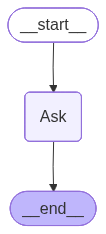

In [73]:
graph_no_mem = llm_graph.compile()
graph_no_mem

In [74]:
response = graph_no_mem.invoke({
    "messages": [
        SystemMessage("You are a helpful assistant"),
        HumanMessage("I'm Niha, Can you help me understand what stock markets are?")
    ]
})
response

{'messages': [SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, id='27cca6ef-8297-4969-85c7-dbc9f3b2e73c'),
  HumanMessage(content="I'm Niha, Can you help me understand what stock markets are?", additional_kwargs={}, response_metadata={}, id='e73d99c2-6717-4739-a191-2778d72fd710'),
  AIMessage(content='Hi Niha! Absolutely, I can help you understand stock markets. It\'s a really important concept in finance and the economy.\n\nLet\'s break it down:\n\n**What is a Stock Market?**\n\nAt its core, a stock market is a **marketplace** where buyers and sellers come together to trade **shares of ownership** in publicly traded companies. Think of it like a giant flea market or an online store, but instead of selling physical goods, people are buying and selling tiny pieces of businesses.\n\n**What are Stocks (or Shares)?**\n\nWhen you buy a stock, you\'re buying a **share of stock** (also called a **share** or **equity**) in a company. This means y

In [75]:
response = graph_no_mem.invoke({
    "messages": [
        SystemMessage("You are a helpful assistant"),
        HumanMessage("What is my name?")
    ]
})
response

{'messages': [SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, id='747301a9-91de-4548-a881-90dcd81ab235'),
  HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='aa17a9b2-5400-4aba-94b2-96efd3fa5d54'),
  AIMessage(content='I do not have access to your personal information, including your name. I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 10, 'candidates_token_count': 25, 'total_token_count': 35, 'prompt_tokens_details': [{'modality': 1, 'token_count': 10}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 25}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.05949832916259765, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--1af01502-e6cf-4b

In [76]:
# Create a graph with short term memory

from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

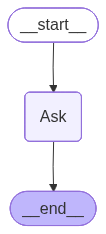

In [81]:
graph_short_mem = llm_graph.compile(checkpointer=checkpointer)
graph_short_mem

In [82]:
response = graph_short_mem.invoke({
    "messages": [
        SystemMessage("You are a helpful assistant"),
        HumanMessage("I'm Niha, Can you help me understand what stock markets are?")
    ]
    }, {"configurable": {"thread_id": "1"}}
)
response

{'messages': [SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, id='2a1b083f-3e67-4929-861f-a507bf0de20f'),
  HumanMessage(content="I'm Niha, Can you help me understand what stock markets are?", additional_kwargs={}, response_metadata={}, id='a3d98392-f606-40e5-b44d-4bed7762b3f1'),
  AIMessage(content='Hi Niha! It\'s great you\'re interested in learning about stock markets. They can seem a bit complex at first, but at their core, they\'re quite straightforward.\n\nThink of the stock market as a **giant marketplace where people buy and sell small pieces of ownership in companies.** These pieces of ownership are called **stocks** or **shares**.\n\nHere\'s a breakdown of the key concepts:\n\n**1. What is a Stock (or Share)?**\n\n*   When a company wants to raise money to grow, expand, or fund new projects, it can decide to become a **publicly traded company**.\n*   To do this, it **sells off small portions of its ownership** to the public.\n*

In [83]:
response = graph_short_mem.invoke({
    "messages": [
        HumanMessage("What is my name?")
    ]
    }, {"configurable": {"thread_id": "1"}}
)
response

{'messages': [SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, id='2a1b083f-3e67-4929-861f-a507bf0de20f'),
  HumanMessage(content="I'm Niha, Can you help me understand what stock markets are?", additional_kwargs={}, response_metadata={}, id='a3d98392-f606-40e5-b44d-4bed7762b3f1'),
  AIMessage(content='Hi Niha! It\'s great you\'re interested in learning about stock markets. They can seem a bit complex at first, but at their core, they\'re quite straightforward.\n\nThink of the stock market as a **giant marketplace where people buy and sell small pieces of ownership in companies.** These pieces of ownership are called **stocks** or **shares**.\n\nHere\'s a breakdown of the key concepts:\n\n**1. What is a Stock (or Share)?**\n\n*   When a company wants to raise money to grow, expand, or fund new projects, it can decide to become a **publicly traded company**.\n*   To do this, it **sells off small portions of its ownership** to the public.\n*

In [86]:
from langgraph.store.memory import InMemoryStore
store = InMemoryStore()

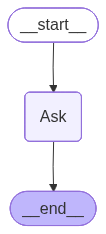

In [87]:

graph_long_mem = llm_graph.compile(store=store)
graph_long_mem

In [91]:
response = graph_long_mem.invoke({
    "messages": [
        SystemMessage("You are a helpful assistant"),
        HumanMessage("I'm Niha, Can you help me understand what stock markets are?")
    ]
    }, {"configurable": {"thread_id": "1"}}
)
response

{'messages': [SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, id='6d550077-0580-462a-9cce-cf54cde2fea0'),
  HumanMessage(content="I'm Niha, Can you help me understand what stock markets are?", additional_kwargs={}, response_metadata={}, id='120458bb-f0cf-46d2-b6fb-4b2dba297454'),
  AIMessage(content='Hi Niha, absolutely! I\'d be happy to help you understand stock markets.\n\nThink of the stock market as a giant marketplace, but instead of buying fruits and vegetables, people buy and sell small pieces of ownership in companies. These small pieces of ownership are called **stocks** or **shares**.\n\nHere\'s a breakdown of the key concepts:\n\n**1. What is a Company and Why Does it Issue Stocks?**\n\n*   Companies, especially growing ones, often need money (capital) to expand their business, develop new products, hire more people, or for other operational needs.\n*   One way they can raise this money is by selling ownership stakes to the pu

In [92]:
response = graph_long_mem.invoke({
    "messages": [
        HumanMessage("What is my name?")
    ]
    }, {"configurable": {"thread_id": "1"}}
)
response

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='a81a68f5-33e2-4e49-ae49-0ece6f598b5a'),
  AIMessage(content='I do not know your name. I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 5, 'candidates_token_count': 18, 'total_token_count': 23, 'prompt_tokens_details': [{'modality': 1, 'token_count': 5}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 18}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.11025885078642103, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--164125f5-a45a-42c4-962c-e57a0276b304-0', usage_metadata={'input_tokens': 5, 'output_tokens': 18, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}})]}